# Artificial Neurons

In this notebook, I implement a __Perception__ learning algorithm and discuss its limitations. As a natural extension I implement __Adaptive Linear Neurons__ and __Stochastic Gradient Descent__.

## Packages
I built object oriented API:s using numpy. For visualizations I used matplotlib for visualizations and pandas to preprocess the data (iris set).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Artificial Neurons and Binary Classification

The net input (z) is a linear combination of inputs ($\vec{x}$) and weights ($\vec{w}$):

$$ z = w_1 x_1 + ... + w_m x_m = \vec{w}^{T} \vec{x}. $$



If the input of an example, $\vec{x}^{(i)}$, is greater than a defined threshold $\theta$, we predict class 1 and otherwise we predict class -1. This can be implemented using a variant of the unit step function:

$$ \phi (z) = \begin{cases}
1 \; if \; z \geq \theta\\
-1 \; otherwise
\end{cases}$$

The negative threshold is usually called *bias unit* and is denoted:

$$ w_0 = - \theta$$

## The Update Rule
1. Initialize the weights to 0 or small random numbers

2. For each training exmaple $\vec{x}^{(i)}$:

    a) Compute the output value $\vec{\hat{y}}$.
    
    b) Update the weights.

The simeltaneous update of each compnent in the weight vector can be written as:

$$ w_j := w_j + \Delta w_j$$

where:

$$ \Delta w_j = \eta \; ( \vec{y}^{(i)} - \vec{\hat{y}}^{(i)} ) \; x_{j}^{(i)} $$

Here, $\eta$ is the _learning rate_, where usually:

$$ 0 \leq \eta \leq 1.$$


## Object Oriented Implementation in Python

In [3]:

class Perceptron(object):
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        
        # Initialize weights to a m+1 dimensional vector, where
        # m is the number of dimensions in the dataset. The
        # extra element is for the bias unit. 
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi)) 
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Testing the perceptron class on the Iris dataset

We will extract the 50 first Iris-versicolor and the 50 first Iris-setosa. 

In [4]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases',
                 'iris','iris.data')

df = pd.read_csv(s,
                header=None,
                encoding='utf-8')

df.head()



,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


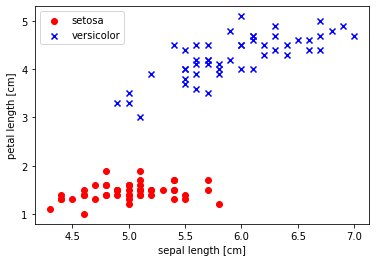

In [5]:
# Select versicolor and setosa
# We only want the values (no axes labels)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal lengthm which
# is column 0 na d2 in the dataframe. 
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
           color='red', marker='o', label='setosa')

plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

### Train the perceptron algorithm on the dataset

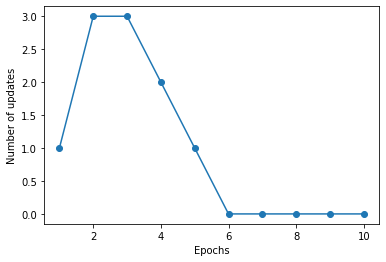

In [6]:
# Cerate instance of the perfeptron

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1),
         ppn.errors_, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()


### Training result
We see that the perceptron converged after the 6:th epoch.

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # The decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
    

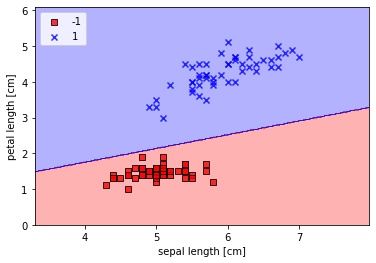

In [8]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')

### Convergence

As seen in the plot, the perceptron converged perfectly. However, the perceptron learning rule can **only** converge if the two calsses can be separated by a **linear hyperplane**. Thus, convergence is one of the main problems with perceptrons.

# Adaptive linear neurons (Adaline)

The Adaline algorithm illustrates the key concepts of defining and _minimizing continuous cost functions_. 

The main difference between the _Adaline rule_ and the perception rule is that the weights are updated based on a _linear activation function_ rather than a unit step function. 

In Adaline, the activation function is simply the identity:

$$ \phi(\vec{w}^{T} \vec{x}) = \vec{w}^{T} \vec{x} .$$

The Adaline algorithm uses the linear activation function for optimizing the weights and a _threshold function_ (similar to the unit step function) to make the final predictions. This means thet Adeline compares the continuous valued output with the calsslabels during training, rather than the final predictions.  

## Minimizing the cost functions with __gradient descent__

The _objective function_ is to be optimized during the learning process. Usually, the objective funciton is a cost function that we want to minimize. In Adaline, we define the cost function $J$:

$$ J(w) = \frac{1}{2} \sum_{i} ( y^{(i)} - \phi(z^{(i)})^{2}$$

Note that $J(w)$ is a _differentiable_ function and that the term $\frac{1}{2}$ makes for a more simple gradient of the expression without changing the optimal weight vector. Note also that $J$ is a _convex_, meaning that _gradient descent_ will work in order the minimize the cost function. 

# Gradient descent

In the gradient descent algorithm, we "climb down the hill" by taking steps in the direction of the _negative gradient_ on the cost function:

$$ \vec{w} := \vec{w} + \Delta\vec{w}$$

Here we define the weight change according to:

$$ \Delta w = - \eta \nabla J(\vec{w})$$

The gradient is simply the partial derivative with respect to each weight, $w_j$:

$$ \frac{\partial J}{\partial w_j} =  - \sum_{i} \left( y^{(i)} - \phi ( z^{(i)}) \right) x_{j}^{(i)}$$

Thus finally:

$$ \Delta w_j =  \eta \sum_{i} \left( y^{(i)} - \phi ( z^{(i)}) \right) x_{j}^{(i)}$$

Note that $\phi ( z^{(i)} )$ is a _real_ number and not an integer class label. Alse note that the weight update is based on all examples in the training set, which is why this algirithm is known as __batch gradient descent__.

In [9]:
class AdalineGD(object):
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01,
                              size = 1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            # The gradients for all weights
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2
            self.cost_.append(cost)
            
        return self
            
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        # The activation function is the identity in ADALINE.
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    

## Test

Let's plot how the number of epochs differ for two different learning rates: $0.01$ and $0.0001$. 

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

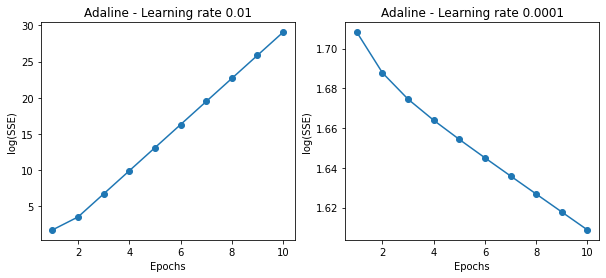

In [10]:
ada1 = AdalineGD(n_iter = 10, eta = 0.01).fit(X, y)
ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X, y)


# Set up two plots.
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

# Left subplot with learning rate of 0.01.
ax[0].plot(range(1, len(ada1.cost_) + 1),
           np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(SSE)')
ax[0].set_title('Adaline - Learning rate 0.01')

# Right subplot with learning rate of 0.0001
ax[1].plot(range(1, len(ada2.cost_) + 1),
           np.log10(ada2.cost_), marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(SSE)')
ax[1].set_title('Adaline - Learning rate 0.0001')


## The issue of bad learning rates

The left plot shows what happend if the learning rate is too big. The error becomes larger as we _overshoot_ the global minimum of the cost function. The right plot instead actually shows decreasing error, but it never converges to the global minimum. This is a sign that we probably set a too small learning rate.

By experimenting, I found that $\eta = 0.000518$ seems to give a nice convergence.

Text(0.5, 1.0, 'Adaline - Learning rate 0.001')

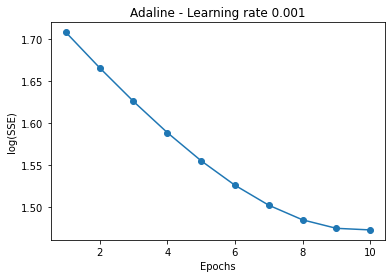

In [11]:
ada = AdalineGD(n_iter = 10, eta = 0.000518).fit(X, y)


# Set up two plots.
fig, ax = plt.subplots(nrows = 1, ncols = 1)

# Left subplot with learning rate of 0.01.
ax.plot(range(1, len(ada.cost_) + 1),
           np.log10(ada.cost_), marker = 'o')
ax.set_xlabel('Epochs')
ax.set_ylabel('log(SSE)')
ax.set_title('Adaline - Learning rate 0.001')

## Feature Scaling

Grandient descent is one of many machine learning algorithms that benefit from __feature scaling__. We will now implement _standardization_ to help Adaline converge more quickly. Standardization means that the dataset will become _normally distributed_, that is, zero mean and unit variance (or $\sigma = 1$).

We can standardize the $j:th$ feature by subtracting each example of the feature with the sample mean and dividing by the standard deviation:

$$ \vec{x}_{j}^{\prime} = \frac{\vec{x}_j - \vec{\mu}_j}{\sigma_j} $$

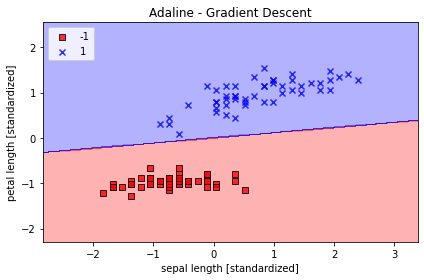

In [12]:
# Normalize the data

X_std = np.copy(X)

# Standardize both features separately
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada_gd = AdalineGD(n_iter = 15, eta = 0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier = ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()

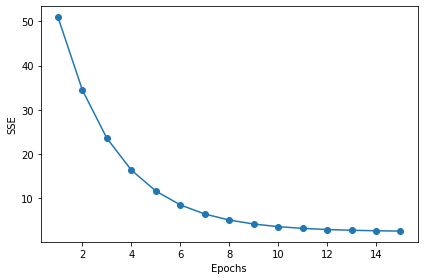

In [13]:
plt.plot(range(1, len(ada_gd.cost_) + 1),
         ada_gd.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.tight_layout()

## Stochastic Gradient Descent

In large-scale machine learning applications it is not uncommon for a dataset to contain millions of data points. It would then become too computationally heavy to calculate the gradient of each step using the _entire batch_. 

Using a techinque known as __stochastic gradient descent (SGD)__ (sometimes called iterative or online gradient descent) we can _approximate_ the gradients by updating the weights incrementally for each training example:

$$ \eta \left( y^{(i)} - \phi ( z^{(i)}) \right) x_{j}^{(i)}. $$

This will often help the algorithm to converge faster than the ordinary gradient descent.

To obtain good results using SGD it is important to present training data in a random order. We also want to shuffle the training dataset for every epoch to avoid cycles. One trick to enable further annealning to the cost minimum is to implement an _adaptive_ learning rate that decreases over time. 

Beyond faster convergence, another advantage with SGD is that it can be used for _online learning_. This is useful when new data is accumulating over time, since we can update our machine learning model continuously. One example of this is customer data in a web application. IF storage space is an issue, we can disregard data after the model has been updated. 